In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
df = pd.read_csv('./clean_cpi.csv')

In [ ]:
#check the columns' type
df.dtypes

In [72]:
df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUT,CPI,TOT,AGRWTH,M,2011-01-01,2.502317
1,AUT,CPI,TOT,AGRWTH,M,2011-02-01,3.021771
2,AUT,CPI,TOT,AGRWTH,M,2011-03-01,3.092950
3,AUT,CPI,TOT,AGRWTH,M,2011-04-01,3.310327
4,AUT,CPI,TOT,AGRWTH,M,2011-05-01,3.315974
...,...,...,...,...,...,...,...
5611,EU27_2020,CPI,TOT,AGRWTH,M,2019-12-01,1.600000
5612,EU27_2020,CPI,TOT,AGRWTH,M,2020-01-01,1.700000
5613,EU27_2020,CPI,TOT,AGRWTH,M,2020-02-01,1.600000
5614,EU27_2020,CPI,TOT,AGRWTH,M,2020-03-01,1.100000


In [73]:
#format the time
df.TIME = pd.to_datetime(df.TIME)

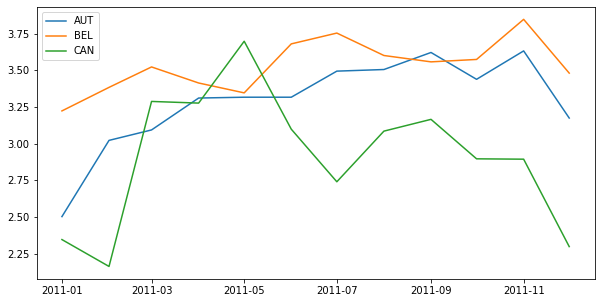

In [74]:
#compare the AUT, BEL, CAN's cpi in 2011
plt.figure(figsize = (10, 5))
df2 = df[(df.LOCATION == "BEL") & (df.TIME < "2012-01-01")]
df3 = df[(df.LOCATION == "CAN") & (df.TIME < "2012-01-01")]
plt.plot(df.head(12).TIME, df.head(12).Value, label = "AUT")
plt.plot(df2.TIME, df2.Value, label = "BEL")
plt.plot(df3.TIME, df3.Value, label = "CAN")
plt.legend()
plt.show()

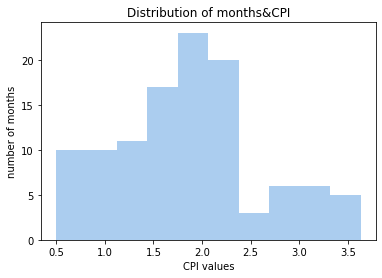

In [84]:
#histogram
plt.hist(df1.Value, color = "#abcdef")
plt.xlabel("CPI values")
plt.ylabel("number of months")
plt.title("Distribution of months&CPI")
plt.show()

In [80]:
df1

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
1,AUT,CPI,TOT,AGRWTH,M,2011-02,3.021771
2,AUT,CPI,TOT,AGRWTH,M,2011-03,3.092950
3,AUT,CPI,TOT,AGRWTH,M,2011-04,3.310327
4,AUT,CPI,TOT,AGRWTH,M,2011-05,3.315974
5,AUT,CPI,TOT,AGRWTH,M,2011-06,3.315974
...,...,...,...,...,...,...,...
107,AUT,CPI,TOT,AGRWTH,M,2019-12,1.693321
108,AUT,CPI,TOT,AGRWTH,M,2020-01,1.990521
109,AUT,CPI,TOT,AGRWTH,M,2020-02,2.180095
110,AUT,CPI,TOT,AGRWTH,M,2020-03,1.597744


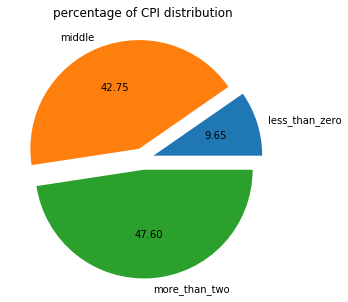

In [103]:
#pie chart
plt.figure(figsize = (10, 5))
less_than_zero = df.loc[df["Value"] < 0].count()[0]
middle = df.loc[(df["Value"] >= 0) & (df["Value"] <= 2)].count()[0]
more_than_two = df.loc[(df["Value"] > 2)].count()[0]
labels = ["less_than_zero", "middle", "more_than_two"]
plt.pie([less_than_zero, middle, more_than_two], labels = labels, autopct = "%.2f", explode = (0.1, 0.1, 0.1))
plt.title("percentage of CPI distribution")
plt.show()

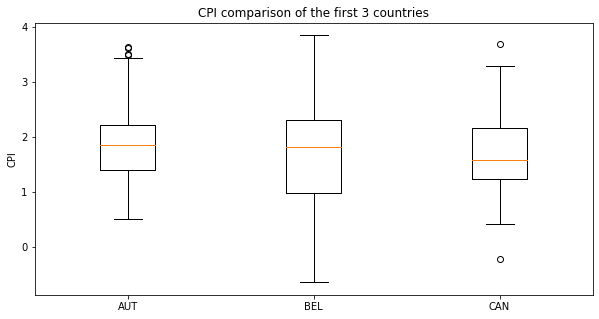

In [121]:
#boxplot
plt.figure(figsize = (10, 5))
value_of_AUT = df.loc[df["LOCATION"] == "AUT"]["Value"]
value_of_BEL = df.loc[df["LOCATION"] == "BEL"]["Value"]
value_of_CAN = df.loc[df["LOCATION"] == "CAN"]["Value"]
plt.title("CPI comparison of the first 3 countries")
plt.ylabel("CPI")
plt.boxplot([value_of_AUT, value_of_BEL, value_of_CAN], labels = ["AUT", "BEL", "CAN"])

plt.show()